<a href="https://colab.research.google.com/github/faizanahemad/eva/blob/master/assignment-4/1st_CandidateArchitectures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **1st File: Candidate Architectures**
    - Receptive field of full image
    - MaxPool vs 1x1 with stride=2
    - Stop at 4x4 or 5x5 or 6x6 or 7x7 or 9x9
    - Start with 16 vs 32 vs 64 (64 filters was a winner in assignment 3), We will test this by visualizing the 1st layer and checking if some kernels are dead kernels.
    - 10 Epochs
    - Total candidate architectures in this file = `2x4x4 = 32`
    - We will promote 8 architectures from here

In [0]:
import pandas as pd
import numpy as np
import time
import gc
import os
import sys
import dill
from matplotlib import pyplot as plt
%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [0]:
!pip install --upgrade --upgrade-strategy only-if-needed https://github.com/faizanahemad/data-science-utils/tarball/master > /dev/null

In [3]:
# When using in colab, upload lib.py, in the left side pane open files and then click upload
from data_science_utils.vision.keras import *

Using TensorFlow backend.


In [4]:

X_train, Y_train, X_test, Y_test = get_mnist_data()
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


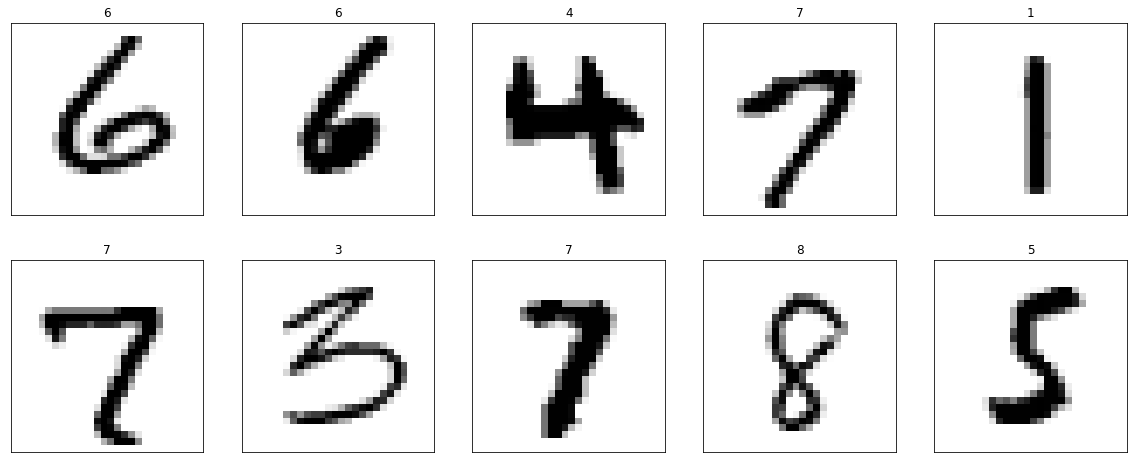

In [5]:
show_examples(X_train[10:20], Y_train[10:20],classes=get_mnist_labels())

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
import warnings
warnings.filterwarnings("ignore")

In [7]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1))) # 26
model.add(keras.layers.Dropout(0.2))
model.add(Convolution2D(16, 1, activation='relu'))
model.add(Convolution2D(16, 3,3, activation='relu')) # 24
model.add(MaxPooling2D(pool_size=(2, 2))) #12

model.add(Convolution2D(32, 3,3, activation='relu')) # 10
model.add(keras.layers.Dropout(0.2))
model.add(Convolution2D(16, 3,3, activation='relu')) # 8
model.add(MaxPooling2D(pool_size=(2, 2))) #4



model.add(Convolution2D(32, 3,3, activation='relu')) # 2
model.add(keras.layers.Dropout(0.2))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(10, 1))


model.add(Flatten())
model.add(Activation('softmax'))
print("Params = ",model.count_params())

model.compile(loss='categorical_crossentropy',
             optimizer="adam",
             metrics=['accuracy'])

_=model.fit(X_train, Y_train, batch_size=2048, epochs=10, verbose=0, shuffle=True, validation_split=0.1)

_=evaluate(model,X_train, Y_train,classes=get_mnist_labels(),print_results=True, plot_results=False)
_=evaluate(model,X_test, Y_test,classes=get_mnist_labels(),print_results=True, plot_results=False)


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Params =  17402
Instructions for updating:
Use tf.cast instead.
 =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-= 
Total Model Params =  17402
Score =  [0.14127881088107824, 0.9611166666666666]
Balanced Accuracy = 96.08% 
 =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-= 
Total Model Params =  17402
Score =  [0.12340558772683144, 0.9662]
Balanced Accuracy = 96.59% 


In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
dropout_1 (Dropout)          (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 16)        528       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 16)        2320      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 32)        4640      
_________________________________________________________________
dropout_2 (Dropout)          (None, 10, 10, 32)        0         
__________

Compute filters 8 to 12
Costs of filter   8:     5 ( 0.48s )
Costs of filter   9:     1 ( 0.43s )
Costs of filter  10:     4 ( 0.42s )
Costs of filter  11:     1 ( 0.43s )
4 filter processed.
Filter Losses
 [4.722839, 0.8339687, 3.691726, 1.005284]


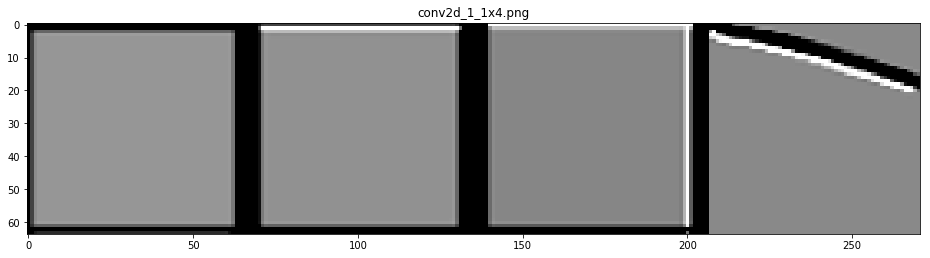

In [9]:
# K.int_shape(model.inputs[0])[-1]
visualize_layer(model,"conv2d_1",filter_range=(8,12),upscaling_steps=20,
                    upscaling_factor=1.1,
                    output_dim=(64, 64))

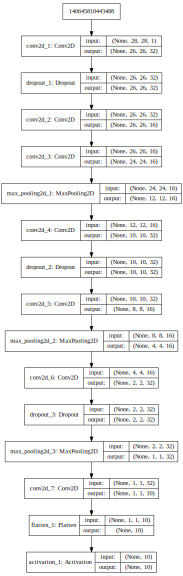

In [10]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

m2d = model_to_dot(model, show_shapes=True,)
m2d.set_size('8x18')
SVG(m2d.create(prog='dot', format='svg'))